# 一起来打怪之 Credit Scoring 练习

-------
## >>>说明：
### 1. 答题步骤：
- 回答问题**请保留每一步**操作过程，请不要仅仅给出最后答案
- 请养成代码注释的好习惯

### 2. 解题思路：
- 为方便大家准确理解题目，在习题实战中有所收获，本文档提供了解题思路提示
- 解题思路**仅供参考**，鼓励原创解题方法
- 为督促同学们自己思考，解题思路内容设置为**注释**，请注意查看

### 3. 所用数据：
- 问题使用了多个数据库，请注意导入每个数据库后都先**查看和了解数据的基本性质**，后面的问题不再一一提醒

--------
## 操作题

### 信用卡欺诈项目

 #### 前期数据导入,预览及处理(此部分勿修改，涉及的数据文件无需复制移动)

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import zipfile
with zipfile.ZipFile('KaggleCredit2.csv.zip', 'r') as z:
    f = z.open('KaggleCredit2.csv')
    data = pd.read_csv(f, index_col=0)
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45.0,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0
1,0,0.957151,40.0,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0
2,0,0.658180,38.0,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0
3,0,0.233810,30.0,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0
4,0,0.907239,49.0,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0


In [2]:
# 检查数据维度
data.shape

(112915, 11)

In [3]:
# 查看数据缺失值情况
data.isnull().sum(axis=0)

SeriousDlqin2yrs                           0
RevolvingUtilizationOfUnsecuredLines       0
age                                     4267
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                              0
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      4267
dtype: int64

In [4]:
# 清除缺失值
data.dropna(inplace=True)
data.shapey = data['SeriousDlqin2yrs']
X = data.drop('SeriousDlqin2yrs', axis=1)

C:\Users\ZJR\AppData\Local\Temp\ipykernel_37268\2980780030.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.shapey = data['SeriousDlqin2yrs']


In [5]:
# 取出对应的X和y
y = data['SeriousDlqin2yrs']
X = data.drop('SeriousDlqin2yrs', axis=1)
# 查看平均的欺诈率
y.mean()

0.06742876076872101

### 以下为操作题

#### 1.把数据切分成训练集和测试集

In [6]:
# 提示：查看train_test_split函数

from sklearn.model_selection import train_test_split #导入数据切分包

#数据切分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=0)

#查看维度
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((76053, 10), (32595, 10), (76053,), (32595,))

train set:
0    70898
1     5155
Name: SeriousDlqin2yrs, dtype: int64
test set:
0    30424
1     2171
Name: SeriousDlqin2yrs, dtype: int64


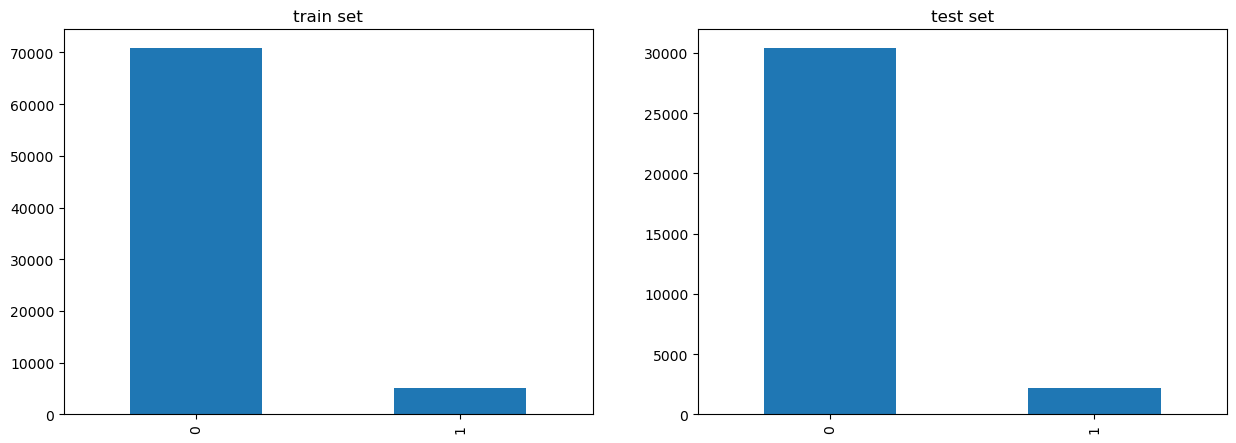

In [7]:
# 通过SeriousDlqin2yrs字段查看正负样本分布情况
# 提示：value_counts
print("train set:")
print(y_train.value_counts())
print("test set:")
print(y_test.value_counts())

# 绘制两种类别的柱状图
# 提示：dataframe可以直接plot(kind='bar')
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('train set')
y_train.value_counts().plot(kind = 'bar')

plt.subplot(1,2,2)
plt.title('test set')
y_test.value_counts().plot(kind = 'bar')
plt.show() #可以看到两个集的两种类别比例差不多

#### 2.数据预处理之离散化

In [8]:
# 请对年龄按照3岁一个区间进行离散化
# 提示：可以先计算出分桶边界，再基于pandas的cut函数进行离散化(分箱、分桶)

#求最大、最小值
age_max = data['age'].max()
age_min = data['age'].min()

bucket = [i*3 for i in range(int(age_max)//3+2)] #创建分桶边界
#对各个集合进行离散化
X_train['age_range'] = pd.cut(X_train['age'], bucket) 
X_test['age_range'] = pd.cut(X_test['age'], bucket) 
print(X_train['age_range'])

64329     (24, 27]
70087     (81, 84]
77642     (69, 72]
6017      (54, 57]
106521    (81, 84]
            ...   
22092     (45, 48]
47726     (27, 30]
44326     (66, 69]
45320     (27, 30]
70966     (57, 60]
Name: age_range, Length: 76053, dtype: category
Categories (35, interval[int64, right]): [(0, 3] < (3, 6] < (6, 9] < (9, 12] ... (93, 96] < (96, 99] < (99, 102] < (102, 105]]


#### 3.数据预处理之独热向量编码

In [10]:
# 请对上述分箱后的年龄段进行独热向量编码
# 提示：使用pandas的get_dummies完成

#对各个集合进行独热向量编码
age_dummies_train = pd.get_dummies(X_train['age_range'], prefix = 'age_range') 
age_dummies_test = pd.get_dummies(X_test['age_range'], prefix = 'age_range') 

#合并到集合中
X_train = pd.concat([X_train, age_dummies_train], axis = 1)
X_test = pd.concat([X_test, age_dummies_test], axis = 1)

#删除本来的age参数
X_train.drop(['age', 'age_range'], axis = 1, inplace = True)
X_test.drop(['age', 'age_range'], axis = 1, inplace = True)

X_test

,RevolvingUtilizationOfUnsecuredLines,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,"age_range_(0, 3]","age_range_(3, 6]","age_range_(6, 9]","age_range_(9, 12]","age_range_(12, 15]","age_range_(15, 18]","age_range_(18, 21]","age_range_(21, 24]","age_range_(24, 27]","age_range_(27, 30]","age_range_(30, 33]","age_range_(33, 36]","age_range_(36, 39]","age_range_(39, 42]","age_range_(42, 45]","age_range_(45, 48]","age_range_(48, 51]","age_range_(51, 54]","age_range_(54, 57]","age_range_(57, 60]","age_range_(60, 63]","age_range_(63, 66]","age_range_(66, 69]","age_range_(69, 72]","age_range_(72, 75]","age_range_(75, 78]","age_range_(78, 81]","age_range_(81, 84]","age_range_(84, 87]","age_range_(87, 90]","age_range_(90, 93]","age_range_(93, 96]","age_range_(96, 99]","age_range_(99, 102]","age_range_(102, 105]"
107294,0.128706,0.0,0.790269,4500.0,24.0,0.0,4.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
39317,0.108896,0.0,0.159920,2000.0,12.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
40606,0.153372,0.0,0.375656,4000.0,9.0,0.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
68931,0.067802,0.0,0.297658,16696.0,13.0,0.0,1.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20745,0.399198,0.0,0.223816,17500.0,16.0,0.0,2.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65166,0.112090,0.0,0.124898,6100.0,6.0,0.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
109192,0.360511,0.0,0.559328,5949.0,11.0,0.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
85812,0.274942,0.0,0.356038,5108.0,16.0,0.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
50213,0.174594,0.0,0.270698,8333.0,9.0,0.0,2.0,0.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### 4.数据预处理之幅度缩放

In [26]:
# 请对连续值特征进行幅度缩放
# 提示：可以使用StandardScaler等幅度缩放器进行处理
from sklearn.preprocessing import StandardScaler #导入包

sc = StandardScaler() #简写缩放函数

continuous_variable = ['RevolvingUtilizationOfUnsecuredLines',\
                       'DebtRatio','MonthlyIncome',\
                       'NumberOfOpenCreditLinesAndLoans'] #这些连续变量需要缩放

#对训练集进行缩放
sc.fit(X_train[continuous_variable])
X_train_std = X_train
X_train_std[continuous_variable] = sc.transform(X_train[continuous_variable])

#对测试集进行缩放
sc.fit(X_test[continuous_variable])
X_test_std = X_test
X_test_std[continuous_variable] = sc.transform(X_test[continuous_variable])

X_train_std #举例查看训练集

,RevolvingUtilizationOfUnsecuredLines,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,"age_range_(0, 3]","age_range_(3, 6]","age_range_(6, 9]","age_range_(9, 12]","age_range_(12, 15]","age_range_(15, 18]","age_range_(18, 21]","age_range_(21, 24]","age_range_(24, 27]","age_range_(27, 30]","age_range_(30, 33]","age_range_(33, 36]","age_range_(36, 39]","age_range_(39, 42]","age_range_(42, 45]","age_range_(45, 48]","age_range_(48, 51]","age_range_(51, 54]","age_range_(54, 57]","age_range_(57, 60]","age_range_(60, 63]","age_range_(63, 66]","age_range_(66, 69]","age_range_(69, 72]","age_range_(72, 75]","age_range_(75, 78]","age_range_(78, 81]","age_range_(81, 84]","age_range_(84, 87]","age_range_(87, 90]","age_range_(90, 93]","age_range_(93, 96]","age_range_(96, 99]","age_range_(99, 102]","age_range_(102, 105]"
64329,-0.022432,0.0,0.090374,-0.244427,-0.327599,0.0,0.0,0.0,1.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
70087,-0.022674,0.0,-0.577713,0.192130,0.062406,0.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
77642,-0.022717,0.0,-1.298500,-0.078536,-0.327599,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6017,-0.022774,0.0,-0.177879,0.223765,-0.132596,0.0,2.0,0.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
106521,-0.022716,0.0,-0.496932,-0.333004,-1.107608,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22092,-0.020751,1.0,-0.012784,0.239582,1.622425,0.0,1.0,0.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
47726,-0.019201,0.0,-1.067234,-0.269735,-1.302611,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
44326,-0.021850,0.0,-0.171493,-0.187485,-0.912606,0.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
45320,-0.019277,1.0,-0.929873,-0.187485,-0.717604,0.0,0.0,0.0,3.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### 5.使用logistic regression建模，并且输出一下系数，分析重要度。   

In [81]:
# 提示：fit建模，建完模之后可以取出coef属性
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter = 1000) #设定回归参数
fit_data = lr.fit(X_train_std, y_train)

In [82]:
#显示各项系数的重要度
for i in range(X_train_std.columns.__len__()):
   print(X_train_std.columns[i]+ ':\t\t'+ str(fit_data.coef_[0][i]))

RevolvingUtilizationOfUnsecuredLines:		-0.014244790350494385
NumberOfTime30-59DaysPastDueNotWorse:		0.48143664027026284
DebtRatio:		0.3116135465941757
MonthlyIncome:		-0.12652141789297822
NumberOfOpenCreditLinesAndLoans:		-0.09515071183943047
NumberOfTimes90DaysLate:		0.47397163991317637
NumberRealEstateLoansOrLines:		-0.18232733989332192
NumberOfTime60-89DaysPastDueNotWorse:		-0.9149659011268721
NumberOfDependents:		0.09647920258679786
age_range_(0, 3]:		0.0
age_range_(3, 6]:		0.0
age_range_(6, 9]:		0.0
age_range_(9, 12]:		0.0
age_range_(12, 15]:		0.0
age_range_(15, 18]:		0.0
age_range_(18, 21]:		-0.7047152102055817
age_range_(21, 24]:		0.7007539081857562
age_range_(24, 27]:		0.8128301846389923
age_range_(27, 30]:		0.7756756153316595
age_range_(30, 33]:		0.5495508312740334
age_range_(33, 36]:		0.546051145313119
age_range_(36, 39]:		0.29769150900170616
age_range_(39, 42]:		0.41910989714596303
age_range_(42, 45]:		0.2613109308604954
age_range_(45, 48]:		0.28686826144560146
age_range_(48

#### 6.使用网格搜索交叉验证进行调参
调整penalty和C参数，其中penalty候选为"l1"和"l2"，C的候选为[1,10,100,500]

In [86]:
# 提示：先按照上面要求准备好网格字典，再使用GridSearchCV进行调参

#设置网格字典
param_grid = {'C': [1, 10, 100, 500],
              'penalty': ['l1', 'l2']}

from sklearn.model_selection import GridSearchCV #导入相关包

grid_search = GridSearchCV(lr, param_grid, cv = 5) #设定网格搜索

gridfit = grid_search.fit(X_train_std, y_train) #进行网格搜索

C:\Users\ZJR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ZJR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ZJR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ZJR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: S

In [94]:
# 输出最好的超参数
# 输出最好的模型

print("最好的超参数："+str(grid_search.best_params_))
print("最好的模型："+str(grid_search.best_estimator_))

最好的超参数：{'C': 1, 'penalty': 'l2'}
最好的模型：LogisticRegression(C=1, max_iter=1000)


#### 7.在测试集上进行预测，计算 查准率/查全率/auc/混淆矩阵/f1值 等测试指标

In [124]:
# 提示：在测试集上预测可以使用predict
# 提示：各种指标可以在sklearn.metrics中查到各种评估指标，分别是accuracy_score、recall_score、auc、confusion_matrix、f1_score

from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix, f1_score #导入相关包

#设置最好模型简写
lr_best = grid_search.best_estimator_

y_pred = lr_best.predict(X_test_std) #用最好模型预测

print('查准率：'+str(accuracy_score(y_test,y_pred)))
print('查全率：'+str(recall_score(y_test,y_pred)))
print('AUC：'+str(roc_auc_score(y_test,y_pred)))
print('混淆矩阵：\n'+str(confusion_matrix(y_test,y_pred)))
print('f1值：'+str(f1_score(y_test,y_pred)))

查准率：0.9338855652707471
查全率：0.04099493321050207
AUC：0.5192977558505837
混淆矩阵：
[[30351    73]
 [ 2082    89]]
f1值：0.07629661380197171


#### 8.更多优化
银行通常会有更严格的要求，因为欺诈带来的后果通常比较严重，一般我们会调整模型的标准。   

比如在logistic regression当中，一般我们的概率判定边界为0.5，但是我们可以把阈值设定低一些，来提高模型的“敏感度”   
试试看把阈值设定为0.3，再看看这个时候的混淆矩阵等评估指标。

Text(0, 0.5, 'Frequency')

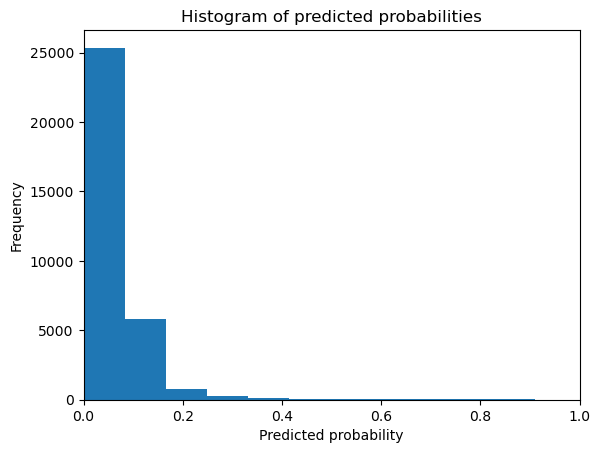

In [182]:
# 提示：thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
# 根据predict_proba的结果和threshold的比较确定结果，再评估各种结果指标



#读取预测概率
y_pred_prob = lr_best.predict_proba(X_test_std)[:, 1]

# 设置画图在笔记本中可显示
%matplotlib inline
import matplotlib.pyplot as plt

# 画预测概率的直方图
plt.hist(y_pred_prob, bins=12)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability')
plt.ylabel('Frequency')

In [183]:
#观察到大多数概率在0.3以下

#调节threshold至0.3
from sklearn.preprocessing import binarize
y_pred_class = binarize(y_pred_prob.reshape(-1, 1), threshold = 0.3)[:,0]

#看看混淆矩阵如何
print('confusion_matrix of threshold 0.5:\n'+ str(confusion_matrix(y_test,y_pred)))
print('confusion_matrix of threshold 0.3:\n' + str(confusion_matrix(y_test, y_pred_class)))

confusion_matrix of threshold 0.5:
[[30351    73]
 [ 2082    89]]
confusion_matrix of threshold 0.3:
[[30196   228]
 [ 1943   228]]


In [247]:
#可以看到灵敏度提高

#再看看召回率等
print('recall score of threshold 0.5:\t\t'+str(recall_score(y_test, y_pred)))
print('recall score of threshold 0.3:\t\t'+str(recall_score(y_test, y_pred_class)))
print('accuracy score of threshold 0.5:\t'+str(accuracy_score(y_test, y_pred)))
print('accuracy score of threshold 0.3:\t'+str(accuracy_score(y_test, y_pred_class)))
print('AUC of threshold 0.5:\t\t\t'+str(roc_auc_score(y_test, y_pred)))
print('AUC of threshold 0.3:\t\t\t'+str(roc_auc_score(y_test, y_pred_class)))
print('f1 score of threshold 0.5:\t\t'+str(f1_score(y_test, y_pred)))
print('f1 score of threshold 0.3:\t\t'+str(f1_score(y_test, y_pred_class)))

recall score of threshold 0.5:		0.04099493321050207
recall score of threshold 0.3:		0.1050207277752188
accuracy score of threshold 0.5:	0.9338855652707471
accuracy score of threshold 0.3:	0.9333946924374904
AUC of threshold 0.5:			0.5192977558505837
AUC of threshold 0.3:			0.5487633220785114
f1 score of threshold 0.5:		0.07629661380197171
f1 score of threshold 0.3:		0.17358203273696235


In [157]:
#可以看到召回率上升，精确度差不多，AUC略微上升，f1分上升

#### 9.尝试对不同特征的重要度进行排序，通过特征选择的方式，对特征进行筛选。并重新建模，观察此时的模型准确率等评估指标。

In [208]:
# 可以根据逻辑回归的系数绝对值大小进行排序，也可以基于树模型的特征重要度进行排序
# 特征选择可以使用RFE或者selectFromModel

from sklearn.ensemble import RandomForestClassifier #导入树包

forest = RandomForestClassifier() #缩写树

forest.fit(X_train_std, y_train) #进行特征拟合

RandomForestClassifier()

In [210]:
importance = pd.Series(dtype = 'float64') #设置显示重要度的空列
#将参数名称和重要度录入
for i in range(X_train.shape[1]):
    importance[X_train.columns[i]] = forest.feature_importances_[i]

In [216]:
importance.sort_values(ascending = False, inplace = True) #进行重要度排序
importance #显示重要度

RevolvingUtilizationOfUnsecuredLines    1.863193e-01
DebtRatio                               1.676320e-01
MonthlyIncome                           1.657168e-01
NumberOfOpenCreditLinesAndLoans         9.933797e-02
NumberOfTimes90DaysLate                 8.340631e-02
NumberOfTime30-59DaysPastDueNotWorse    6.237445e-02
NumberOfDependents                      4.653217e-02
NumberOfTime60-89DaysPastDueNotWorse    4.470366e-02
NumberRealEstateLoansOrLines            3.441856e-02
age_range_(45, 48]                      8.313373e-03
age_range_(48, 51]                      8.248533e-03
age_range_(42, 45]                      8.119858e-03
age_range_(51, 54]                      8.084273e-03
age_range_(39, 42]                      7.615092e-03
age_range_(36, 39]                      7.497626e-03
age_range_(30, 33]                      6.725394e-03
age_range_(33, 36]                      6.536695e-03
age_range_(54, 57]                      6.322994e-03
age_range_(57, 60]                      6.1291

In [227]:
from sklearn.feature_selection import SelectFromModel #导入相关包

#特征选择，选择0.15时只有3个特征感觉有点少，故调成0.06个
sfm = SelectFromModel(forest, threshold = 0.06, prefit = True) 

X_selected_train_std = sfm.transform(X_train_std) 
X_selected_test_std = sfm.transform(X_test_std)

X_selected_train_std.shape, X_selected_test_std.shape #显示选择后的特征数

C:\Users\ZJR\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\ZJR\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


((76053, 6), (32595, 6))

In [231]:
lr_best.fit(X_selected_train_std, y_train) #再重新用这几个特征进行拟合

LogisticRegression(C=1, max_iter=1000)

In [236]:
y_pred_prob_less_feature = lr_best.predict_proba(X_selected_test_std)[:, 1]
y_pred_class_less_feature = binarize(y_pred_prob_less_feature.reshape(-1, 1), threshold = 0.3)[:,0]

In [246]:
print('recall score of all features:\t\t'+str(recall_score(y_test, y_pred_class)))
print('recall score of less features:\t\t'+str(recall_score(y_test, y_pred_class_less_feature)))
print('accuracy score of all features:\t\t'+str(accuracy_score(y_test, y_pred_class)))
print('accuracy score of less features:\t'+str(accuracy_score(y_test, y_pred_class_less_feature)))
print('AUC of all features:\t\t\t'+str(roc_auc_score(y_test, y_pred_class)))
print('AUC of less features:\t\t\t'+str(roc_auc_score(y_test, y_pred_class_less_feature)))
print('f1 score of all features:\t\t'+str(f1_score(y_test, y_pred_class)))
print('f1 score of less features:\t\t'+str(f1_score(y_test, y_pred_class_less_feature)))

recall score of all features:		0.1050207277752188
recall score of less features:		0.01243666513127591
accuracy score of all features:		0.9333946924374904
accuracy score of less features:	0.9334560515416475
AUC of all features:			0.5487633220785114
AUC of less features:			0.5058074727181492
f1 score of all features:		0.17358203273696235
f1 score of less features:		0.024291497975708502


In [241]:
#召回率大幅下滑，说明还是有些很重要的黑天鹅特征不在6个特征里面，如果要抗风险，还是需要多考虑一些特征

#### 10.其他模型算法尝试
使用RandomForestClassifier/SVM/KNN等sklearn分类算法进行分类，尝试上述超参数调优算法过程。

In [242]:
# 随机森林
from sklearn.ensemble import RandomForestClassifier
# 支持向量机
from sklearn.svm import SVC


In [244]:
# 随机森林
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier() #缩写

rfc.fit(X_train_std, y_train) #进行初步拟合

RandomForestClassifier()

In [250]:
y_pred_rfc = rfc.predict(X_test_std)
#查看准确率和召回率
print('accuracy score:\t\t'+str(accuracy_score(y_test, y_pred_rfc)))
print('recall score:\t\t'+str(recall_score(y_test, y_pred_rfc)))

accuracy score:		0.9356649792913023
recall score:		0.13496084753569784


In [253]:
#试一试进行网格搜索
param_grid_rfc = {"n_estimators":range(1,101,10)}

grid_rfc_search = GridSearchCV(rfc, param_grid_rfc, cv = 5) #设定网格搜索

gridfit_rfc = grid_rfc_search.fit(X_train_std, y_train) #进行网格搜索

In [254]:
print("rfc最好的超参数："+str(grid_rfc_search.best_params_))
print("rfc最好的模型："+str(grid_rfc_search.best_estimator_))

rfc最好的超参数：{'n_estimators': 71}
rfc最好的模型：RandomForestClassifier(n_estimators=71)


In [256]:
rfc_best = grid_rfc_search.best_estimator_
y_pred_rfc_best = rfc_best.predict(X_test_std)
print('accuracy score:\t\t'+str(accuracy_score(y_test,y_pred_rfc_best)))
print('recall score:\t\t'+str(recall_score(y_test,y_pred_rfc_best)))

accuracy score:		0.9351434269059672
recall score:		0.13542146476278213


In [257]:
#可以看到召回率略微提高一些

In [259]:
# 支持向量机
from sklearn.svm import SVC

svm = SVC()

svm.fit(X_train_std, y_train) #进行初步拟合

SVC()

In [262]:
y_pred_svm = svm.predict(X_test_std)
#查看准确率和召回率
print('accuracy score:\t\t'+str(accuracy_score(y_test, y_pred_svm)))
print('recall score:\t\t'+str(recall_score(y_test, y_pred_svm)))

accuracy score:		0.9360331339162449
recall score:		0.0847535697835099


In [263]:
#SVC计算时间太长，这里就不采用网格搜索了，这次减少特征数来拟合试试
svm.fit(X_selected_train_std, y_train)

SVC()

In [265]:
y_pred_svm_less_feature = svm.predict(X_selected_test_std)
#查看准确率和召回率
print('accuracy score:\t\t'+str(accuracy_score(y_test, y_pred_svm_less_feature)))
print('recall score:\t\t'+str(recall_score(y_test, y_pred_svm_less_feature)))

accuracy score:		0.9351434269059672
recall score:		0.07922616305849839


In [267]:
#可以看到召回率略微下降，所以与lr时结论不矛盾

In [268]:
# K最近邻
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(X_train_std, y_train) #进行初步拟合

KNeighborsClassifier()

In [275]:
y_pred_knn = knn.predict(X_test_std)
#查看准确率和召回率
print('accuracy score:\t\t'+str(accuracy_score(y_test, y_pred_knn)))
print('recall score:\t\t'+str(recall_score(y_test, y_pred_knn)))

accuracy score:		0.9315232397606995
recall score:		0.15614923998157532


In [271]:
#试一试进行网格搜索
param_grid = {'weights':['uniform'],'n_neighbors':[i for i in range(1,11)]}
grid_knn_search = GridSearchCV(knn, param_grid, cv = 5)#设定网格搜索

gridfit_knn = grid_knn_search.fit(X_train_std, y_train) #进行网格搜索

In [273]:
print("knn最好的超参数："+str(grid_knn_search.best_params_))
print("knn最好的模型："+str(grid_knn_search.best_estimator_))

knn最好的超参数：{'n_neighbors': 10, 'weights': 'uniform'}
knn最好的模型：KNeighborsClassifier(n_neighbors=10)


In [274]:
knn_best = grid_knn_search.best_estimator_
y_pred_knn_best = knn_best.predict(X_test_std)
print('accuracy score:\t\t'+str(accuracy_score(y_test,y_pred_knn_best)))
print('recall score:\t\t'+str(recall_score(y_test,y_pred_knn_best)))

accuracy score:		0.9348366313851818
recall score:		0.0981114693689544


In [276]:
#准确率略微提升，召回率下降